In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/statisticallearning-2020/Sheet08/Solution'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/statisticallearning-2020/Sheet08/Solution


In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.special as sspecial
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Exercise 1

We divide the entrie mathematical derivation into three steps:  
Step I - relate the sample weight with its exponential loss of the previous step:
\begin{eqnarray*}
\omega_t(i)&=&\frac{\omega_{t-1}(i)}{Z_{t-1}}\exp\left(-\alpha_{t-1}y_ih_{t-1}(x_i)\right) \\
&=&\frac{\omega_{t-2}(i)}{Z_{t-1}Z_{t-2}}\exp\left(-(\alpha_{t-1}y_ih_{t-1}(x_i)+\alpha_{t-2}y_ih_{t-2}(x_i))\right) \\
&=&\frac{1}{N}\frac{\exp\left(-y_i\sum_{j=1}^{t-1}\alpha_jh_j(x_i)\right)}{\prod_{j=1}^{t-1}Z_j}\\
&=&\frac{1}{N}\frac{\exp\left(-y_iF_{t-1}(x_i)\right)}{\prod_{j=1}^{t-1}Z_j}
\end{eqnarray*}
Step II - proof sample weights are normalised, i.e. $\sum_{i=1}^N\omega_{t}(i)=1$  
first we have $\sum_{i=1}^N\omega_1(i)=\sum_{i=1}^N\frac{1}{N}=1$, we assume $\sum_{i=1}^N\omega_{t}(i)=1$, then:  \begin{eqnarray*}
\sum_{i=1}^N\omega_{t+1}(i)&=&\sum_{i=1}^N\left[\frac{\omega_t(i)}{Z_t}\exp(-\alpha_ty_ih_t(x_i))\right]\\
&=&\frac{1}{Z_t}\left[\sum_{i:h_t(x_i)=y_i}\omega_t(i)e^{-\alpha_t}+\sum_{i:h_t(x_i)\neq{y_i}}\omega_t(i)e^{\alpha_t}\right]\\
&=&\frac{1}{Z_t}\left[\sum_i\omega_t(i)e^{-\alpha_t}-\sum_{i:h_t(x_i)\neq{y_i}}\omega_t(i)e^{-\alpha_t}+\sum_{i:h_t(x_i)\neq{y_i}}\omega_t(i)e^{\alpha_t}\right]\\
&=&\frac{1}{Z_t}\left[e^{-\alpha_t}+(e^{\alpha_t}-e^{-\alpha_t})\epsilon_t\right] \quad\text{$\sum_{i=1}^N\omega_{t}(i)=1$,$\epsilon_t=\frac{\sum_{t=1}^N\omega_t(i)1(h_t(x_i)\neq{y_i})}{\sum_{t=1}^N\omega_t(i)}=\sum_{i:h_t(x_i)\neq{y_i}}\omega_t(i)$}\\
&=&\frac{1}{Z_t}\left[\epsilon_t\sqrt{\frac{1-\epsilon_t}{\epsilon_t}}+(1-\epsilon_t)\sqrt{\frac{\epsilon_t}{1-\epsilon_t}}\right]\quad\text{$\alpha_t=\frac{1}{2}\log{\frac{1-\epsilon_t}{\epsilon_t}}$}\\
&=&\frac{1}{Z_t}2\sqrt{\epsilon_t(1-\epsilon_t)}\quad\text{definition of $Z_t$}\\
&=&1
\end{eqnarray*}


Step III - bound the error:  
\begin{eqnarray*}
EPE(F_T)&=&\frac{1}{N}\sum_{i=1}^N[y_i{\neq}F_T(x_i)]\\
&\leq&\frac{1}{N}\sum_{i=1}^N\exp(-y_iF_T(x_i))\quad\text{Empricial error is upper-bounded by the exponential error}\\
&=&\sum_{i=1}^N\left[\omega_{T+1}(i)\prod_{j=1}^{T}Z_j\right] \quad\text{Step I}\\
&=&\sum_{i=1}^N\omega_{T+1}(i)\prod_{j=1}^{T}Z_j\\
&=&\prod_{t=1}^{T}Z_t\quad\text{Step II}\\
&=&\prod_{t=1}^{T}2\sqrt{\epsilon_t(1-\epsilon_t)}\quad\text{definition of $Z_t$}
\end{eqnarray*}


## Exercise 2

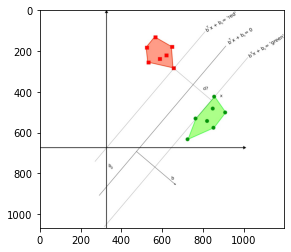

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("bsp.png")
plt.imshow(img)

assume $x^p$ is a projection of $x$ onto the hyperplane $b^t x + b_0 = 0$, then
\begin{eqnarray*}
x^p = x - d \frac{b^t}{||b^t||}\\
b^t x^p + b_0 = 0
\end{eqnarray*}
 
therefore,

\begin{eqnarray*}
b^t (x - d \frac{b^t}{||b^t||}) + b_0 = 0 \\ 
d = \frac{b^t x + b_0}{||b^t||} \\ 
d = \frac{1}{||b^t||}
\end{eqnarray*}


## Exercise 3

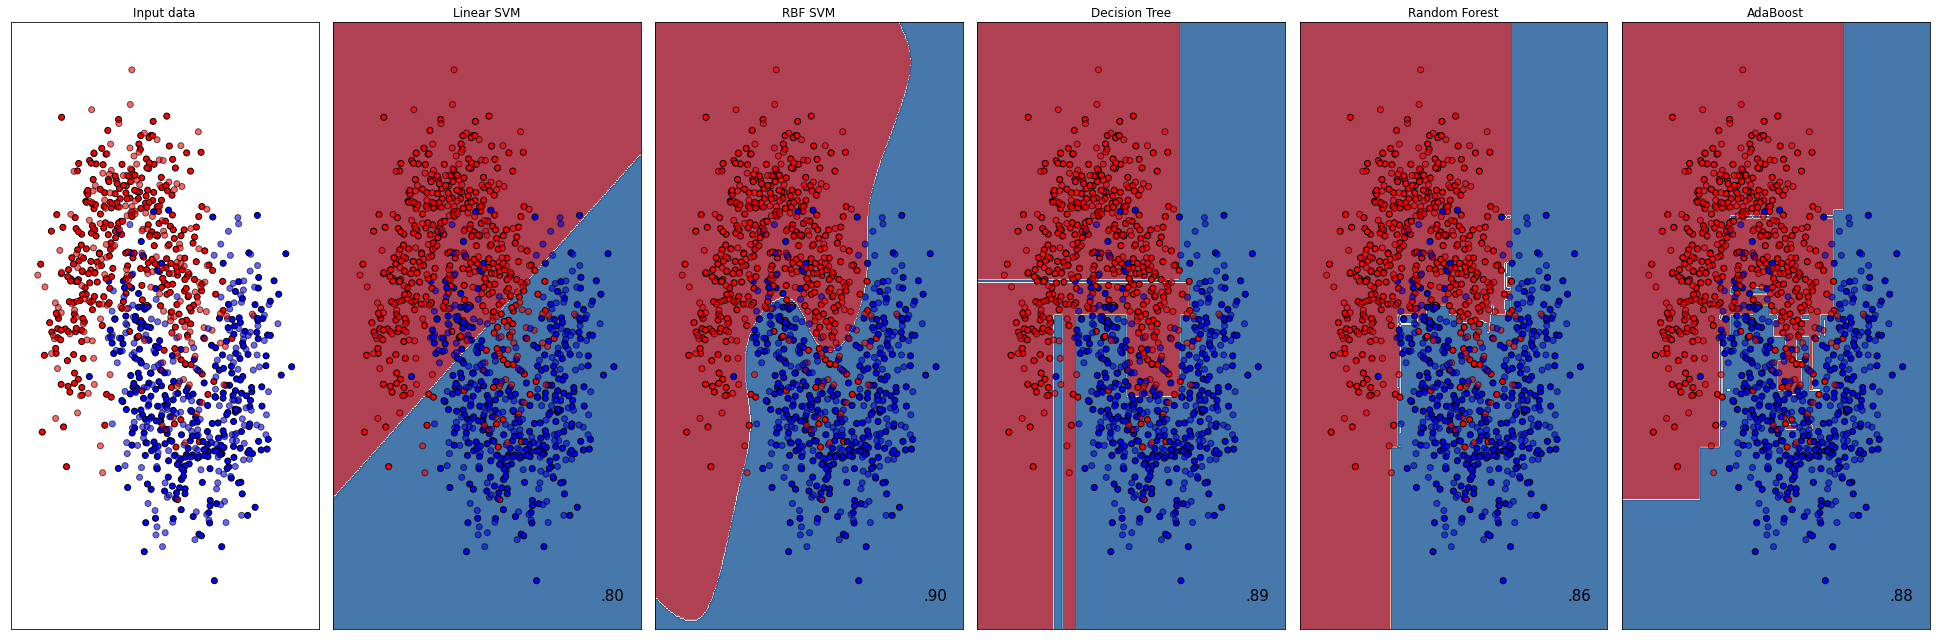

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

h = .02  # step size in the mesh

names = ["Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples=1000, noise=0.3, random_state=0)
#             make_circles(noise=0.2, factor=0.5, random_state=1),
#             linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

From above plots, we can see that linear SVM does not work for nonlinear problem yet with kernel trick, e.g. RBF it works. The decision boundary of random forest turns to be more smoother than decision tree alone. The decision boundary of Adaboost always  parallel to the feature axis, as it uses the decision stumps as weaklearners. 